In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

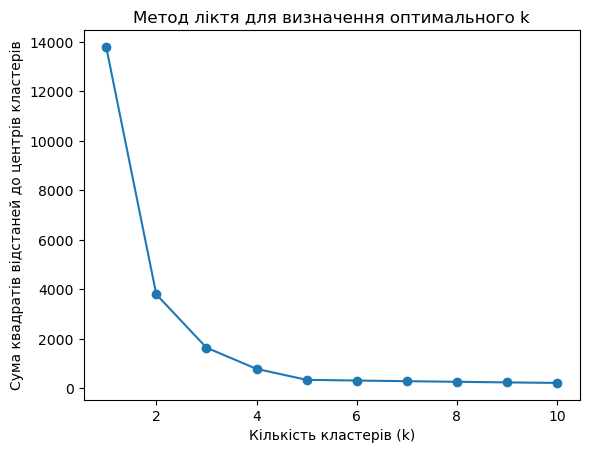

In [2]:
import os
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

os.environ["OMP_NUM_THREADS"] = '2'

X, y = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=0.6, random_state=0)

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Побудова графіка методу ліктя
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Сума квадратів відстаней до центрів кластерів')
plt.title('Метод ліктя для визначення оптимального k')
plt.show()


In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


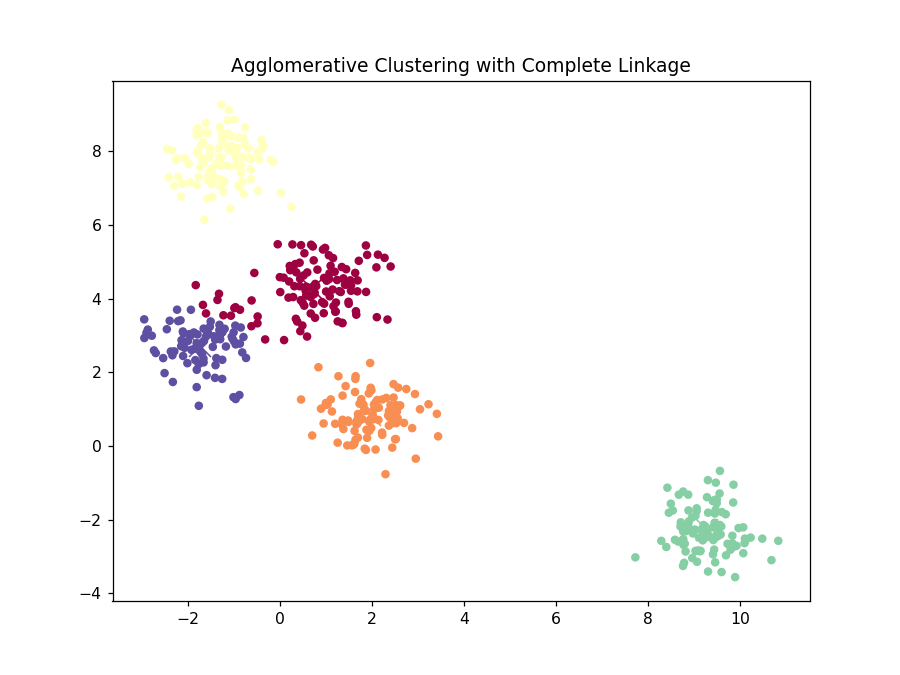

In [4]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Згенеруйте дані
X, y = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=0.6, random_state=0)
colors = np.array([plt.cm.Spectral(val) for val in np.linspace(0, 1, len(set(y)))])
model = AgglomerativeClustering(n_clusters=5, linkage='complete')
clusters = model.fit_predict(X)


colors = np.array([plt.cm.Spectral(val) for val in np.linspace(0, 1, len(set(clusters)))])
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors[clusters], s=20)

for i in range(model.n_clusters_):
    center = X[clusters == i].mean(axis=0)
    plt.plot(center[0], center[1], marker='x', color=colors[i], markersize=14)

plt.title('Agglomerative Clustering with Complete Linkage')
plt.show()


<IPython.core.display.Javascript object>


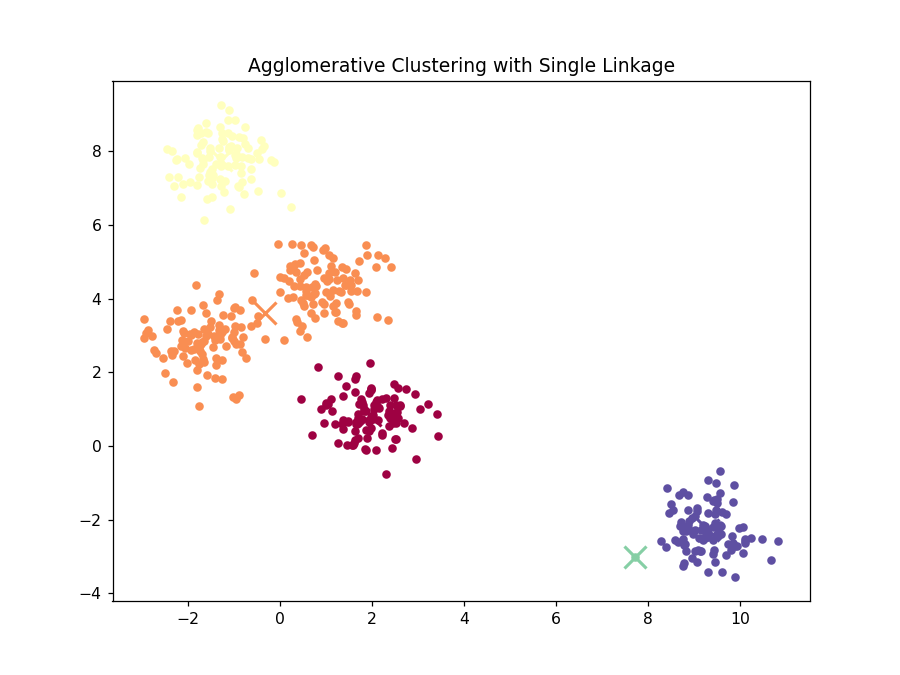

C:\Users\Maks\AppData\Local\Temp\ipykernel_13232\1995163591.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[clusters == i, 0], X[clusters == i, 1], c=colors[i], s=20)


In [5]:
model = AgglomerativeClustering(n_clusters=5, linkage='single')

clusters = model.fit_predict(X)
colors = np.array([plt.cm.Spectral(val) for val in np.linspace(0, 1, len(set(clusters)))])

plt.figure(figsize=(8, 6))
for i in range(model.n_clusters_):
    center = X[clusters == i].mean(axis=0)
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], c=colors[i], s=20)
    plt.plot(center[0], center[1], marker='x', color=colors[i], markersize=14, markeredgewidth=2, markeredgecolor=colors[i])

plt.title('Agglomerative Clustering with Single Linkage')
plt.show()


In [6]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

points,_ = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=0.6, random_state=0)

X = StandardScaler().fit_transform(points)

def apply_db_scan(points, eps):
    dbscan = DBSCAN(eps=eps, min_samples=2, ).fit(points)
    predicted = dbscan.labels_
    n_clusters_and_noice = len(np.unique(predicted))-1
    print ('n_clusters_and_noice ={}\n'.format(n_clusters_and_noice))

    predicted[np.where(predicted == -1)] = n_clusters_and_noice
    return predicted 

predicted  =  apply_db_scan(points, eps=1.6)
print (predicted)

n_clusters_and_noice =1

[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0


<IPython.core.display.Javascript object>


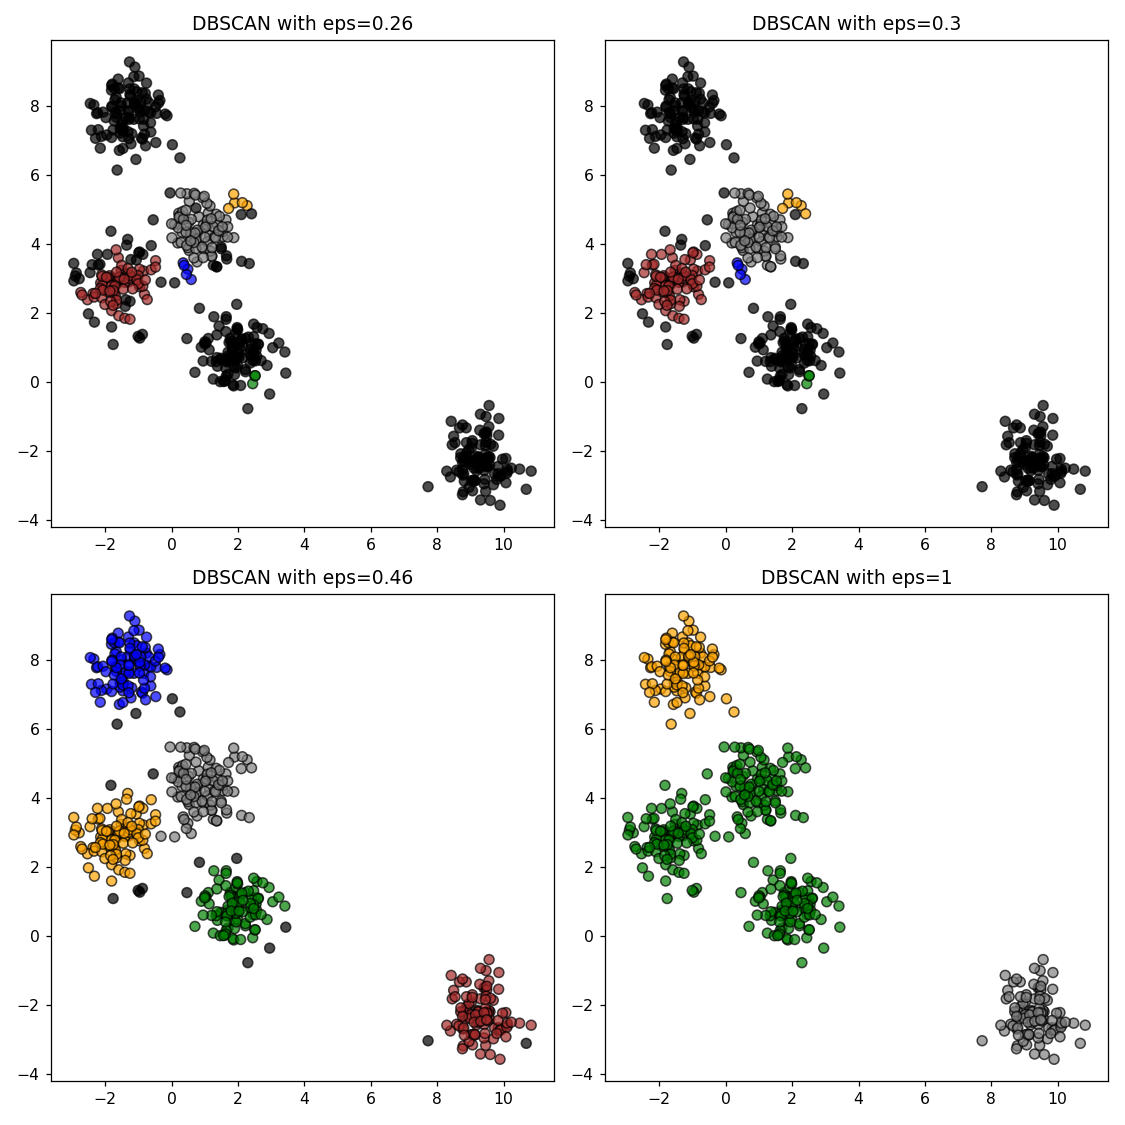

n_clusters_and_noice =29

n_clusters_and_noice =15

n_clusters_and_noice =7

n_clusters_and_noice =2



In [7]:
eps_values = [0.26, 0.3,0.46, 1]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, eps in enumerate(eps_values):
    predicted = apply_db_scan(points, eps=eps)

    colors = np.array(['green', 'grey', 'orange', 'brown', 'blue'])
    colors = np.r_[colors, np.array(['black'] * 100)]

    axes[i // 2, i % 2].scatter(points[:, 0], points[:, 1], c=colors[predicted], s=40, edgecolor='black', label='negative', alpha=0.7)
    axes[i // 2, i % 2].set_title('DBSCAN with eps={}'.format(eps))

plt.tight_layout()
plt.show()